# Analyzing Movie Ratings From Fandango - Biased or Not?

There is some speculation that Fandango skews movie ratings to be more positive. A journalist at fivethirtyeight discovered that rankings are almost always rounded up from their actual value when displayd. For example, a rating of 4.1 would be rounded to 4.5 instead of 4.0, or that 4.5 would be rounded up to 5.0 instead of held constant.

The goal of this project will be simply to do a little bit of visual exploration to attempt to replicate the original findings presented here:

https://fivethirtyeight.com/features/fandango-movies-ratings/

Are Fandango ratings still biased?

## Replicating Hickey's Findings

First, I will do some visualizations of the original data, taken from Hickey's github:

https://github.com/fivethirtyeight/data/tree/master/fandango

In [1]:
import pandas as pd

# Grab in the two relevant data sets, pre and post Hickey
pre_data = pd.read_csv('fandango_score_comparison.csv')
post_data = pd.read_csv('movie_ratings_16_17.csv')

# Print just the column names to see whats up
print(pre_data.columns.tolist())
print(post_data.columns.tolist())

['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round', 'Metacritic_norm_round', 'Metacritic_user_norm_round', 'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes', 'Fandango_Difference']
['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango', 'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore', 'nr_imdb', 'nr_tmeter', 'nr_audience']


In this particular analysis, we're only really interested in Fandango ratings, so I'm going to trim the data sets so they only have columns relating to Fandango.

In [2]:
pre_cols = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
post_cols = ['movie', 'year', 'fandango']

pre_data = pre_data[pre_cols]
post_data = post_data[post_cols]

In these analyses the population that we are interested in exploring is the entirety of the movie ratings on Fandango, both pre and post Hickey's analysis.

The data we have is just a sampling of these movies - not every single movie on Fandango is included. The sampling is not random, but was done with meaningful criteria. For example, in Hickey's original analysis the movie needed to have ratings on all the major site, plus 30 user ratings on Fandango.

Now, given this is an exercise from Dataquest I am going to follow what they do, in that they change their goal to be exploring if there is a difference in Fandango's ratings for popular movies in 2015 and 2016 turning the samples into populations.

This is wildly wrong and a backwards way to go about doing these kind of data driven assessments. I'm going to do it anyways.

In [6]:
# Checking that the movies in each data set have > 30
# ratings and are thus "popular"
print(pre_data['Fandango_votes'].describe())
print(post_data[''].describe())

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

For the pre data, the minimum number of votes is 35, so they are all "popular." The right information is not present in the post data, and I'm not about to go digging through Fandago's site, looking up a random set of movies from these data to look at how many ratings they have. So we'll say yes.

In [11]:
# Isolate movies from the target years for this new
# analysis, 2015 and 2016.
pre_data['Year'] = pre_data['FILM'].str[-5:-1]
fandango_15 = pre_data[pre_data['Year'] == '2015']

fandango_16 = post_data[post_data['year'] == 2016]


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Kernel Density Plots for Fandango Ratings

(0, 5)

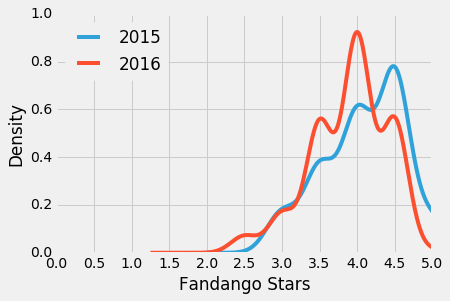

In [24]:
import matplotlib.pyplot as plt
from numpy import arange
% matplotlib inline
plt.style.use('fivethirtyeight')

fandango_15['Fandango_Stars'].plot.kde(label = '2015', legend=True)
fandango_16['fandango'].plot.kde(label = '2016', legend=True)
plt.xlabel('Fandango Stars')
plt.xticks(arange(0,5.1,.5))
plt.xlim(0,5)

Based on what I can see here, the ratings in 2016 look a bit more normal, but centered pretty heavily on 4, compared to the step-like structure of the 2015 ratings.

It looks like their ratings have gotten a little bit less biased towards the top end (4.5 and 5). Let's take a quick look to see if the average was actually lower in 2016.

In [33]:
print('2015', fandango_15['Fandango_Stars'].describe().iloc[[1,2]])
print('2016', fandango_16['fandango'].describe().iloc[[1,2]])

2015 mean    4.085271
std     0.538096
Name: Fandango_Stars, dtype: float64
2016 mean    3.887435
std     0.509540
Name: fandango, dtype: float64


The ratings are a bit lower in 2016, but given those means and standard deviations I'm not sure. That is an effect of Cohen's d = .38, which is about a medium effect. Let's look at the frequency distributions.

In [37]:
print(fandango_15['Fandango_Stars'].value_counts(normalize=True).sort_index())
print(fandango_16['fandango'].value_counts(normalize=True).sort_index())

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64
2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64


The main thing that can be pulled from this is that in 2016 they (a) actually had some ratings below 3, (b) the modal response is 4 instead of 4.5, and (c) there are much less 4.5s and 5s. So the ratings clearly have pulled down a little bit. 

I'll generate a plot of the three summarry stats to compare.

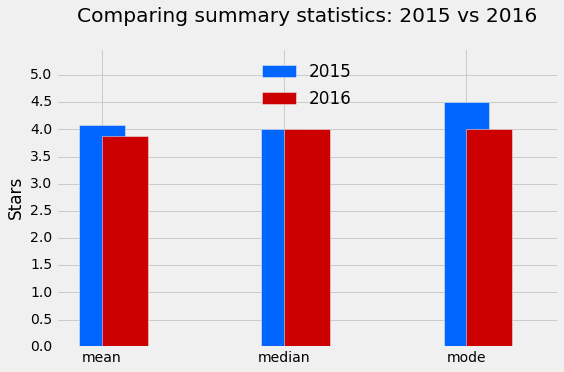

In [50]:
mean_15 = fandango_15['Fandango_Stars'].mean()
mean_16 = fandango_16['fandango'].mean()

median_15 = fandango_15['Fandango_Stars'].median()
median_16 = fandango_16['fandango'].median()

mode_15 = fandango_15['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_16 = fandango_16['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['mean', 'median', 'mode']
summary

summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()